In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2022-10-03 19:03:07.234717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 19:03:07.357483: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-03 19:03:07.822227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/felek/anaconda3/envs/tfgpu/lib/:/home/felek/anaconda3/envs/tfgpu/lib/
2022-10-03 19:03:07.822311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_

In [2]:
x_test = np.load('./datasets/x_test.npy',allow_pickle=True)
x_train = np.load('./datasets/x_train.npy',allow_pickle=True)
x_val = np.load('./datasets/x_val.npy',allow_pickle=True)
y_test = np.load('./datasets/y_test.npy',allow_pickle=True)
y_train = np.load('./datasets/y_train.npy',allow_pickle=True)
y_val = np.load('./datasets/y_val.npy',allow_pickle=True)

In [3]:
x_test.shape

(874, 128, 128)

In [4]:
x_test = x_test.reshape(x_test.shape + (1,))

In [5]:
x_test.shape

(874, 128, 128, 1)

In [6]:
x_train = x_train.reshape(x_train.shape + (1,))
x_val = x_val.reshape(x_val.shape + (1,))

In [7]:
print(f"len of x_train = {len(x_train)}")
print(f"len of x_test = {len(x_test)}")
print(f"len of x_val = {len(x_val)}")

len of x_train = 6985
len of x_test = 874
len of x_val = 873


In [8]:
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
y_val = y_val.astype(np.int32)

In [17]:
y_train

array([6, 0, 0, ..., 7, 5, 9], dtype=int32)

In [23]:
a = np.array([[x_val],[y_val]])

/tmp/ipykernel_22799/64764163.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([[x_val],[y_val]])


ValueError: could not broadcast input array from shape (873,128,128,1) into shape (873,)

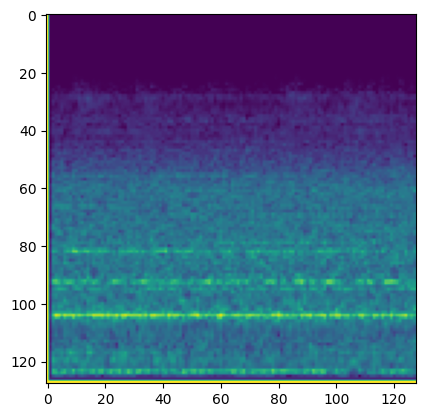

In [9]:
plt.imshow(x_train[7])

In [10]:
model = tf.keras.Sequential()

2022-10-03 19:03:19.359703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 19:03:19.373622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 19:03:19.373997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 19:03:19.374912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [14]:
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32,
                                        kernel_size=(3,3),
                                        strides=(1,1),
                                        activation="relu",
                                        input_shape=(128,128,1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                   
    model.add(tf.keras.layers.Conv2D(64,
                                        kernel_size=(3,3),
                                        strides=(1,1),
                                        activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                   
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(128,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    padding="same",
                                    activation="relu"))    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                   
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Conv2D(128,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    padding="same",
                                    activation="relu"))    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                   
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512,activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(218,activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50


ValueError: in user code:

    File "/home/felek/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/felek/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/felek/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/felek/.local/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/felek/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/home/felek/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/felek/.local/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/felek/.local/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/felek/.local/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/felek/.local/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
